# Genetic Algorithm Test
This following notebook is a proof of concept of genetic algorithms. Showing the random initialisation of the population, mutating the population, and finding the global maximum of the fitness value.
The crossover function that is implemented in this test does not deal with DNA in the traditional sense. In this case, a crossover of genes is the average of two DNA values of parents.

GitHub: GarethCa

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

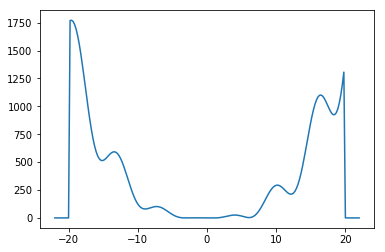

In [2]:
####
# GA Parameters
####
mut_rate = 0.3
####
# Fitness Function - Defines the Fitness Landscape to traverse.
####
def fitness(x):
    if x < -20 or x >20:
        return 0
    return abs((math.cos(x)*(x**2 + x) - (x**3) /5))

# Display Fitness Landscape
x = np.linspace(start=-22,stop=22,num=200)
y = [fitness(num) for num in x]
plt.plot(x,y)

In [3]:
####
# Define a member of the Population
####
class Member:
    
    def __init__(self,mut_step,parent1 = None, parent2=None):
        if parent1 != None:
            if parent2 != None:
                self.crossover(parent1,parent2)
                self.mutate(mut_step)
            else:
                self.dna = seed
                self.mutate(mut_step)
        else:
            self.dna = random.randint(-50,50)/10
        self.fitness = 0
        
    def mutate(self,mut_step):
        if random.random() < mut_rate:
            if random.random() < 0.5:
                self.dna += mut_step * random.random()
            else:
                self.dna -= mut_step * random.random()
    
    def crossover(self,p1,p2):
        self.dna = (p1.dna + p2.dna)/2
    
    def assessFitness(self):
        self.fitness = fitness(self.dna)

In [4]:
def calcFitness(population):
    for member in population:
        member.assessFitness()

def nextGeneration(population, pop_size,mut_step):
    ordered = sorted(population, key= lambda x: x.fitness, reverse=True)
    prob = 0
    del_indices = []
    for i in range(len(ordered)): # Semi-Random Cull of worst Performers.
        if random.random() < prob:
            del_indices.append(i)
        prob += 0.9/len(ordered)
    for i in reversed(del_indices):
        del ordered[i]
    counter =0
    while len(ordered) < pop_size:
        mum = ordered[int(counter/3)]
        dad = ordered[counter+1]
        ordered.append(Member(mut_step,mum, dad))
        counter +=1
    return ordered

The genetic algorithm calculates the fitness of each member of the population, then selectively kills off the worst performers. To regain the population, breeding occurs which creates new members which are like their parents but with mutation as to apply more variation to the population.
By selectively choosing the best performers, we can make the population's fitnesses approach an optimal value. To avoid getting stuck in local minima, we can increase the step size we move for each generation where we do not find a better performer. This is as to potentially randomly mutate to find a higher hill in the fitness landscape.

In [5]:
def geneticAlgorithm(generations=300,pop_size=20):
    history_y = [0]
    history_x = [0]
    mut_step =1
    population =  [Member(mut_step) for i in range(pop_size)]
    for gen in range(generations):
        calcFitness(population)
        fitnesses = [x.fitness for x in population]
        max_fitness = max(fitnesses)
        index = fitnesses.index(max_fitness)
        
        # Every Ten Generations, display stats of mutation.
        if gen % 10 == 0: 
            print("Generation {} has best fitness {:.2f} at x = {:.2f}".format(gen+1,max_fitness,population[index].dna)) 
       
        
        # Avoid being stuck in local minima.
        if max_fitness == history_y[-1]:
            mut_step +=0.4
        else:
            mut_step = 1
        history_y.append(max_fitness)
        history_x.append(population[index].dna)
        population = nextGeneration(population,pop_size,mut_step)
    return history_x, history_y

In [6]:
his_x, his_y = geneticAlgorithm() # Finished Algorithm

Generation 1 has best fitness 30.67 at x = -5.00
Generation 11 has best fitness 73.38 at x = -6.03
Generation 21 has best fitness 102.00 at x = -7.30
Generation 31 has best fitness 102.00 at x = -7.30
Generation 41 has best fitness 102.00 at x = -7.30
Generation 51 has best fitness 437.33 at x = -11.89
Generation 61 has best fitness 591.41 at x = -13.27
Generation 71 has best fitness 1767.98 at x = -19.46
Generation 81 has best fitness 1772.71 at x = -19.63
Generation 91 has best fitness 1772.71 at x = -19.63
Generation 101 has best fitness 1772.71 at x = -19.63
Generation 111 has best fitness 1772.71 at x = -19.63
Generation 121 has best fitness 1772.71 at x = -19.63
Generation 131 has best fitness 1772.71 at x = -19.63
Generation 141 has best fitness 1772.71 at x = -19.63
Generation 151 has best fitness 1772.71 at x = -19.63
Generation 161 has best fitness 1772.71 at x = -19.63
Generation 171 has best fitness 1772.71 at x = -19.63
Generation 181 has best fitness 1772.71 at x = -19.63

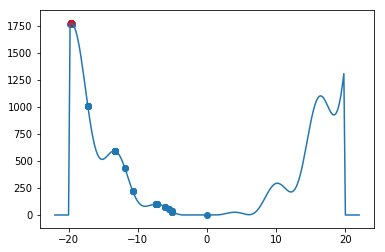

In [7]:
plt.plot(x,y)                            # Plot the feature landscape
plt.scatter(his_x[:-1],his_y[:-1])       # Show history of best fitnesses.
plt.scatter(his_x[-1], his_y[-1], c='r') # Show Final Max Value.